# Build a predictive model using Decision Trees

###  Preparing a Training Set and Training a Decision Tree
We build a predictive model using Decision Trees. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

Load the data and prepare it for modeling. Split the data into training and testing. We use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%).

In [1]:
#import the data analysis libararies for Python
import pandas as pd
import numpy as np

In [2]:
#create a dataframe df and use read_csv to load data into a dataframe 
df = pd.read_csv('Data/Cell2Cell_data.csv')
#print the dataframe to check if the data has been loaded
df.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,48.82,10.00,3.0,26,780,0,0,0,0,1,4,1
1,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
2,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
3,51.42,0.00,0.0,36,59,1,0,0,0,0,4,1
4,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1


Create a numpy series mask which has length of the dataframe and has randomly chosen true and false values.\n
Then, create a train and test dataframe using this mask. Taking the value 0.8 splits the data into 80:20 ratio

In [3]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

In [4]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

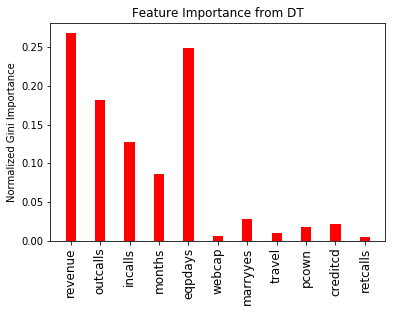

In [5]:
#This can also be done with indexing rather than stating the column names
#Divide the data into into Features and Labels
features = train_df[['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap',
               'marryyes','travel','pcown','creditcd','retcalls']]
labels = train_df[['churndep']]
#you can choose the criterion to be anything, I chose Entropy
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(features, labels)
#sklearn also has build-in means to check which feature contributes more to the prediction.
importances = clf.feature_importances_
#Plot it to check 
fig, ax = plt.subplots()
width = 0.35
ax.bar(range(len(importances)), importances, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap',
               'marryyes','travel','pcown','creditcd','retcalls'], rotation = 90, fontsize='large')
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

Predict the values on train and test data and predict the accuracy of your model. The train data will have very high accuracy as the model tends to overfit on train data. 

In [6]:
from sklearn import metrics
X = test_df.iloc[:,:11]
y = test_df.iloc[:,11]
y_pred=clf.predict(X)
accu_test = metrics.accuracy_score(y,y_pred)
print("The accuracy on the train data is:", accu_test)

X = train_df.iloc[:,:11]
y = train_df.iloc[:,11]
y_pred=clf.predict(X)
accu_train = metrics.accuracy_score(y,y_pred)
print("The accuracy on the train data is:", accu_train)

The accuracy on the train data is: 0.528748590755
The accuracy on the train data is: 0.999811770611


### Lets Find a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:


Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. The range has been chosen by an iterative process. As the data is very large, the minimumm leave size can be large enough to avoid overfitting of the data. The split size shouldn't be very large over a very complex model, but number of observations divided by a few hundreds.

In [7]:
splits= np.arange(500,600)
leaves= np.arange(20,30)

Build a new classifier FOR different values of splits and leaves and check the classifier's accuracy on the test data. 
Next, Plot the test set accuracy for these options.
We use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [8]:
#define a function to build a decision tree classifier and return the accuracy
def testTrees(X_train,y_train,X_test,y_test,split,leaf):
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=split,min_samples_leaf=leaf)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc_pred = metrics.accuracy_score(y_test,y_pred)
    return acc_pred

In [9]:
#Run all of the options
run=1
if (run==1):
    #Initialize dictionary of results
    res=dict()
    for l in leaves:
        res[l]=list()

    #Now train and get results for each option
    for l in leaves:
        for s in splits:
            res[l].append(testTrees(train_df.iloc[:,:11],train_df.iloc[:,11], test_df.iloc[:,:11], test_df.iloc[:,11], s, l))

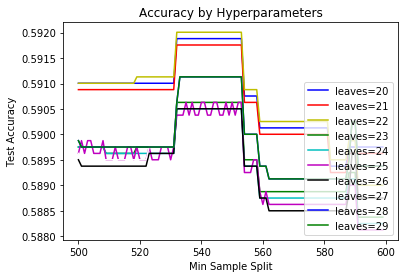

In [10]:
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(splits,res[leaves[0]],'b-',label='leaves={}'.format(leaves[0]))
plt.plot(splits,res[leaves[1]],'r-',label='leaves={}'.format(leaves[1]))
plt.plot(splits,res[leaves[2]],'y-',label='leaves={}'.format(leaves[2]))
plt.plot(splits,res[leaves[3]],'g-',label='leaves={}'.format(leaves[3]))
plt.plot(splits,res[leaves[4]],'c-',label='leaves={}'.format(leaves[4]))
plt.plot(splits,res[leaves[5]],'m-',label='leaves={}'.format(leaves[5]))
plt.plot(splits,res[leaves[6]],'k-',label='leaves={}'.format(leaves[6]))
plt.plot(splits,res[leaves[7]],'w-',label='leaves={}'.format(leaves[7]))
plt.plot(splits,res[leaves[8]],'b-',label='leaves={}'.format(leaves[8]))
plt.plot(splits,res[leaves[9]],'g-',label='leaves={}'.format(leaves[9]))

plt.legend(loc=4)
ax.set_xlabel('Min Sample Split')
ax.set_ylabel('Test Accuracy')
plt.title('Accuracy by Hyperparameters')

Lets perform some more experiments by changing the depth parameter

In [11]:
def testTreesforROC(X_train,y_train,X_test,y_test,dep,leaf,auc):
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=leaf,max_depth=dep)
    clf = clf.fit(X_train,y_train)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test),y_test)
        return (cm[0][0]+cm[1][1])/float(sum(cm))
    else:
        return roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

In [12]:
from sklearn.metrics import roc_auc_score

lab='churndep'

depths=[4,5,10,20]
leaves= list(np.arange(20,30))
#Run all of the options
run=1
if (run==1):
    #Initialize dictionary of results
    res_roc=dict()
    for d in depths:
        res_roc[d]=list()

    #Now train and get results for each option
    for d in depths:
        for l in leaves:
            res_roc[d].append(testTreesforROC(train_df.drop(lab,1),train_df[lab],test_df.drop(lab,1),test_df[lab],d,l,1))
res_roc

{4: [0.62473136501357207,
  0.62473136501357207,
  0.62473136501357207,
  0.62473136501357207,
  0.62473136501357207,
  0.62473136501357207,
  0.62473136501357207,
  0.62473136501357207,
  0.62473136501357207,
  0.62473136501357207],
 5: [0.62652224399402878,
  0.62652249514278302,
  0.62652243235559446,
  0.62652243235559446,
  0.62652243235559446,
  0.62679970058045509,
  0.62679970058045509,
  0.62679970058045509,
  0.62613305760548754,
  0.62613305760548754],
 10: [0.60972510136363733,
  0.60871080572538783,
  0.61072206773783289,
  0.61125340432136599,
  0.61067507152716538,
  0.61016357569523005,
  0.61124659191140274,
  0.61305536524061066,
  0.6125101526883967,
  0.61361122022129222],
 20: [0.58090888976177024,
  0.58348005652856161,
  0.58393171616976047,
  0.58438538500099457,
  0.58104064867704897,
  0.58229457162059262,
  0.58222999499711681,
  0.58517509086561936,
  0.58420471486579617,
  0.58860882802940662]}

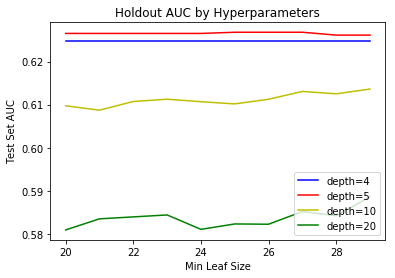

In [13]:
#Now plot            
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(leaves,res_roc[depths[0]],'b-',label='depth={}'.format(depths[0]))
plt.plot(leaves,res_roc[depths[1]],'r-',label='depth={}'.format(depths[1]))
plt.plot(leaves,res_roc[depths[2]],'y-',label='depth={}'.format(depths[2]))
plt.plot(leaves,res_roc[depths[3]],'g-',label='depth={}'.format(depths[3]))
plt.legend(loc=4)
ax.set_xlabel('Min Leaf Size')
ax.set_ylabel('Test Set AUC')
plt.title('Holdout AUC by Hyperparameters')

Does the accuracy of your decision tree increase or decrease? 
It definately increases to a certain extent.

There is a lot of further scope for experiment.

Some refernces:
http://scikit-learn.org/stable/modules/tree.html 

A really cool and simple explanation for starters like me:

https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567

Learn about confusion matrix:
http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/


Credits: This work is a part of classroom course of Foundations of Data Science under Prof. Rumi Chunara